# ランダムフォレストによる解析

このページでは、ランダムフォレストによる解析を行っています。

## 注意事項

- 「Googleへのログインが必要」と出たら、自分のGoogleアカウントでログインします。

- 「警告: このノートブックは Google が作成したものではありません。」と出たら「このまま実行」をクリックします。

Accuracy: 0.89

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.78      0.93      0.85        15
   virginica       0.92      0.73      0.81        15

    accuracy                           0.89        45
   macro avg       0.90      0.89      0.89        45
weighted avg       0.90      0.89      0.89        45



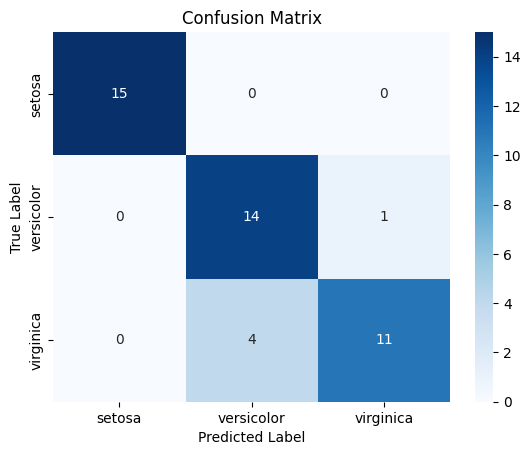

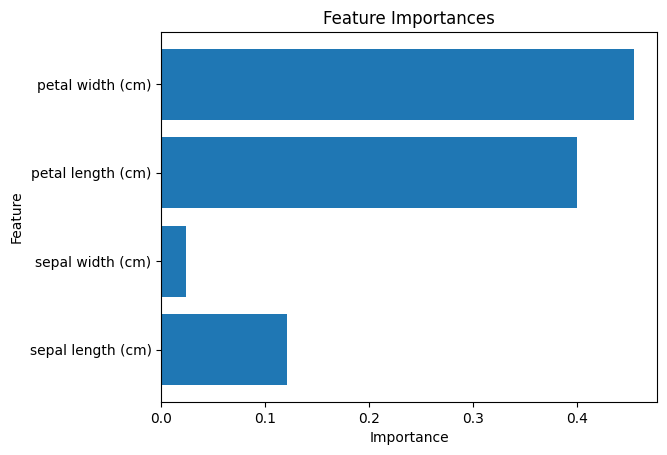

In [2]:
# 必要なライブラリをインポート
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# データセットのロード（Irisデータセット）
iris = load_iris()
X = iris.data  # 特徴量
y = iris.target  # ラベル

# 問題設定: Irisの花の種類を特徴量から分類する
# データ分割（学習データとテストデータ）
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# ランダムフォレストモデルの作成
model = RandomForestClassifier(n_estimators=100, max_features='sqrt', random_state=42)

# モデルの学習
model.fit(X_train, y_train)

# テストデータで予測
y_pred = model.predict(X_test)

# 精度の評価
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# 分類レポートの表示
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# 混同行列のプロット
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# 特徴量の重要度を表示
importances = model.feature_importances_
feature_names = iris.feature_names
plt.barh(feature_names, importances)
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()
